# APAlog Tutorial

In [1]:
library('APAlog')

### Load Counts Matrix and Design

In [130]:
pA.toy2 <- APAlog::pA.toy2
pA_design <- APAlog::pA_design

In [131]:
head(pA.toy2)

,transcript,pA.site,sample,count
,<fct>,<fct>,<fct>,<dbl>
1,Hs.525527.1,site.09,MDA_sgCTRL.r1,1.0635544
2,Hs.525527.1,site.09,MDA_sgCTRL.r2,0.9875983
3,Hs.525527.1,site.09,MDA_sgHNRNPC.r1,2.6289722
4,Hs.525527.1,site.09,MDA_sgHNRNPC.r2,4.1650605
5,Hs.525527.1,site.16,MDA_sgCTRL.r1,38.2879574
6,Hs.525527.1,site.16,MDA_sgCTRL.r2,48.3923165


In [132]:
head(pA_design)

,sample,cell_line,rep
,<fct>,<fct>,<int>
1,MDA_sgCTRL.r1,MDA_sgCTRL,1
2,MDA_sgCTRL.r2,MDA_sgCTRL,2
3,MDA_sgHNRNPC.r1,MDA_sgHNRNPC,1
4,MDA_sgHNRNPC.r2,MDA_sgHNRNPC,2


### Transcript-wise Testing

In [115]:
fit.o_HNRNPC_fdr <- Apalog::pA_logit_dev(pA.toy2,
                                         pA.site ~ cell_line, 
                                         pA_design, 
                                         "sample",  
                                         adj_method = "fdr")

[1] "0% of transcripts had <2 active pA sites and were removed"


In [116]:
head(fit.o_HNRNPC_fdr)

,transcript,p_devtest,fdr_p_devtest
,<fct>,<dbl>,<dbl>
1,Hs.29665.1,0.69366595,0.7983591
2,Hs.432760.1,0.09208986,0.3683594
3,Hs.465374.1,0.68026143,0.7983591
4,Hs.469154.1,0.53798910,0.7983591
5,Hs.515329.1,0.79835908,0.7983591
6,Hs.515688.1,0.78586700,0.7983591


### Pairwise Testing

In [117]:
fit.p_HNRNPC <- APAlog::pA_logit_pairwise(pA.toy2, pA.site~cell_line, pA_design, "sample")

[1] "0% of transcripts had <2 active pA sites and were removed"


In [118]:
fit.op_HNRNPC <- merge(fit.o_HNRNPC_fdr, fit.p_HNRNPC, by = "transcript")

In [119]:
head(fit.op_HNRNPC)

,transcript,p_devtest,fdr_p_devtest,ref_site,alt_site,b_intercept,p_intercept,b_cell_lineMDA_sgHNRNPC,p_cell_lineMDA_sgHNRNPC
,<fct>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Hs.29665.1,0.69366595,0.7983591,site.01,site.04,-0.9287158,3.371762e-02,0.26383691,0.6931826
2,Hs.432760.1,0.09208986,0.3683594,site.01,site.04,0.1163127,7.253476e-01,0.81968395,0.0961106
3,Hs.465374.1,0.68026143,0.7983591,site.07,site.14,1.9501648,3.843961e-05,0.04706095,0.9473727
4,Hs.465374.1,0.68026143,0.7983591,site.07,site.15,1.1085117,3.011978e-02,-0.36878044,0.6423649
5,Hs.465374.1,0.68026143,0.7983591,site.07,site.16,2.1771230,3.239979e-06,0.56571503,0.4165262
6,Hs.465374.1,0.68026143,0.7983591,site.14,site.15,-0.8416530,5.727359e-03,-0.41584139,0.4018149


- Volcano Plot for the corrected p-values against the log fold change

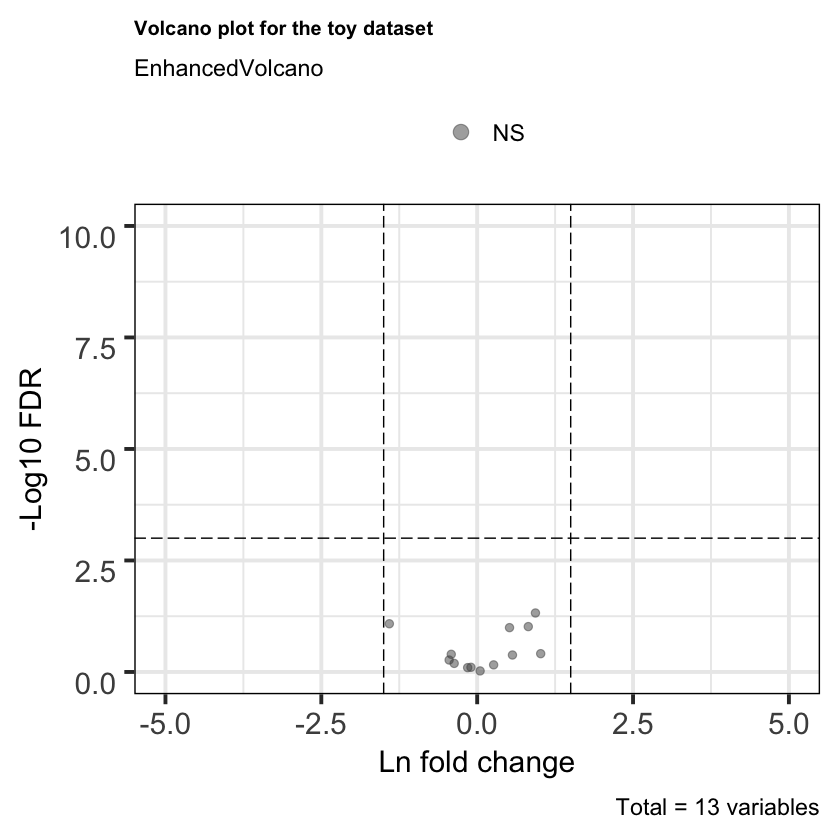

In [122]:
APAlog::volcano_plot(fit.op_HNRNPC, 
                     x='b_cell_lineMDA_sgHNRNPC', 
                     y='p_cell_lineMDA_sgHNRNPC',
                     title='Volcano plot for the toy dataset')

### Multinomial Testing

In [124]:
fit.m_HNRNPC_fdr <- pA_multi_logit(pA.toy2, 
                                   pA.site ~ cell_line, 
                                   pA_design, 
                                   "sample",
                                   adj_method='fdr')

[1] "0% of transcripts had <2 active pA sites and were removed"
# weights:  3 (2 variable)
initial  value 29.927729 
final  value 26.512164 
converged
# weights:  3 (2 variable)
initial  value 51.128270 
final  value 47.404405 
converged
# weights:  12 (6 variable)
initial  value 284.430435 
iter  10 value 221.213446
final  value 221.207404 
converged
# weights:  3 (2 variable)
initial  value 21.026071 
final  value 20.830417 
converged
# weights:  3 (2 variable)
initial  value 123.327065 
iter  10 value 44.701920
final  value 44.701919 
converged
# weights:  3 (2 variable)
initial  value 84.199013 
final  value 83.243669 
converged
# weights:  3 (2 variable)
initial  value 18.125161 
final  value 12.648638 
converged
# weights:  3 (2 variable)
initial  value 114.856686 
final  value 32.731136 
converged


In [125]:
head(fit.m_HNRNPC_fdr)

,transcript,ref_site,alt_site,b_intercept,b_cell_lineMDA_sgHNRNPC,p_intercept,p_cell_lineMDA_sgHNRNPC,fdr_p_intercept,fdr_p_cell_lineMDA_sgHNRNPC
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Hs.29665.1,site.01,site.04,-0.9287923,0.26393472,3.370594e-02,0.69307614,5.617657e-02,0.8879276
2,Hs.432760.1,site.01,site.04,0.1163107,0.81968714,7.253521e-01,0.09611007,7.253521e-01,0.4805503
3,Hs.465374.1,site.07,site.14,1.9501247,0.04715914,3.844257e-05,0.94726351,9.610642e-05,0.9472635
4,Hs.465374.1,site.07,site.15,1.1084713,-0.36860389,3.012377e-02,0.64252405,5.617657e-02,0.8879276
5,Hs.465374.1,site.07,site.16,2.1770842,0.56580901,3.240077e-06,0.41645266,1.080026e-05,0.8879276
6,Hs.469154.1,site.38,site.39,0.2783809,-0.44963759,6.023881e-01,0.53931966,6.693201e-01,0.8879276


- Volcano Plot for the corrected p-values against the log fold change

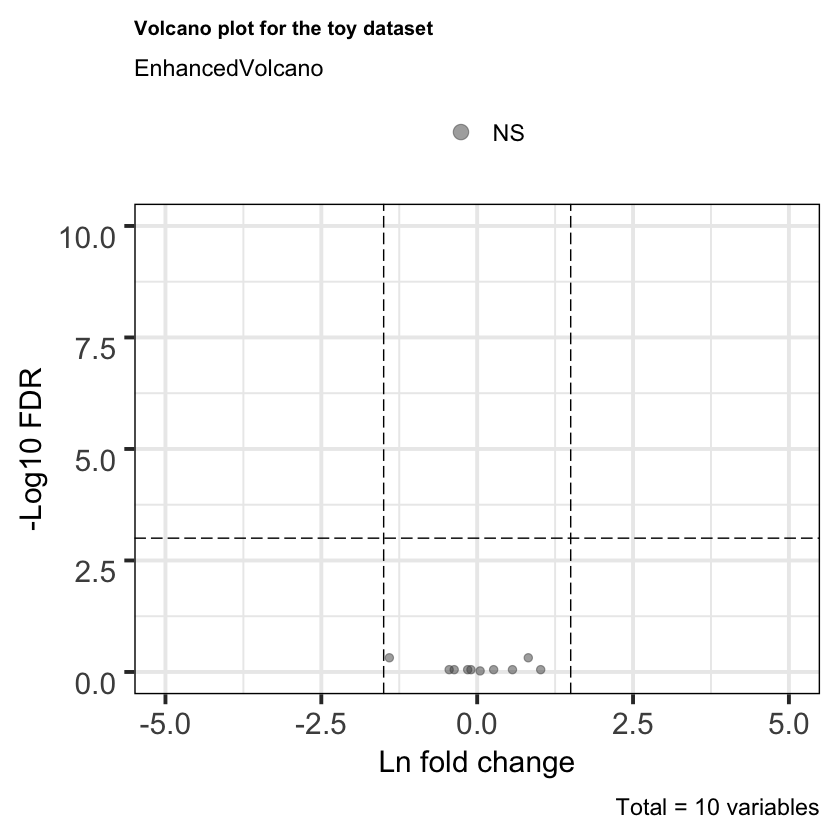

In [133]:
APAlog::volcano_plot(fit.m_HNRNPC_fdr, 
                     x='b_cell_lineMDA_sgHNRNPC', 
                     y='fdr_p_cell_lineMDA_sgHNRNPC',
                     title='Volcano plot for the toy dataset')